In [1]:
# !pip install pyvinecopulib
# !pip install scikit-gstat


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skgstat as skg

from functions.helper import *

import pyvinecopulib as pv


In [3]:
# load in data (same as in spcopula demo)
src = skg.data.meuse(variable='zinc')

coords, vals = src.get('sample')

# make a dataframe
df = pd.DataFrame(
    {'x': coords[:, 0], 'y': coords[:, 1], 'zinc': vals.flatten()})

NUMBER_OF_STATIONS = df.shape[0]
df.head()


,x,y,zinc
0,181072,333611,1022
1,181025,333558,1141
2,181165,333537,640
3,181298,333484,257
4,181307,333330,269


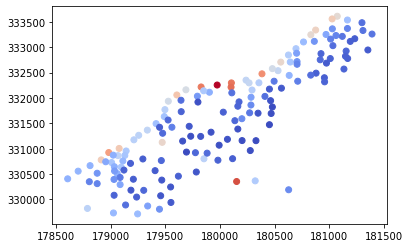

In [4]:
# create a scatter plot of the zinc value in the coordinatess
plt.scatter(df["x"], df["y"], c=df["zinc"], cmap=plt.cm.coolwarm)

In [5]:
# initialize the DataSet class with df and variable
dataset = DataSet(df, "zinc")

In [6]:
# add the rank column to the original dataframe
dataset.add_rank()
dataset.df

,x,y,zinc,rank
0,181072,333611,1022,0.897436
1,181025,333558,1141,0.935897
2,181165,333537,640,0.724359
3,181298,333484,257,0.423077
4,181307,333330,269,0.448718
...,...,...,...,...
150,179184,330182,166,0.144231
151,179085,330292,496,0.628205
152,178875,330311,342,0.512821
153,179466,330381,162,0.134615


In [7]:
# construct the pairs for the whole dataset (without the cutoff value)
dataset.construct_pairs()

# cutoff value for the distance matrix
cutoff_value = 1200

# convert the dataframe in pairs of stations (using the cutoff value)
dataset.apply_cutoff(cutoff_value)

#prints first 5 rows of the pairs of stations dataframe


In [8]:
# build the neighbourhoods (sorted by distance) and store them in a list
neigh_size = 20
dataset.build_neighbourhoods(neigh_size)

# spatial_copula.neighbourhoods[0].rename(columns={"index1": "center_id", "index2": "neigh_id", "rank1": "center_rank", "rank2": "neigh_rank"})[
#     ["center_id", "neigh_id", "distance", "center_rank", "neigh_rank"]]

dataset.neighbourhoods[0]


,index1,index2,rank1,rank2,distance
0,0,1,0.897436,0.935897,70.837843
1,0,2,0.897436,0.724359,118.848643
2,0,7,0.897436,0.576923,252.049598
3,0,6,0.897436,0.525641,258.321505
4,0,3,0.897436,0.423077,259.239272
5,0,12,0.897436,0.923077,336.434243
6,0,4,0.897436,0.448718,366.314073
7,0,13,0.897436,0.634615,373.483601
8,0,8,0.897436,0.532051,380.189426
9,0,83,0.897436,0.455128,399.656102


In [9]:
# calculate bins for the pairs of stations
num_bins = 10

# initiate the spatial copula with dataset, number of bins and cutoff value
spatial_copula = SpatialCopula(dataset, dataset.neighbourhoods, num_bins, cutoff_value)

# calculate the bins
spatial_copula.calculate_bins()

#prints the list of bin means

Bin means: [119.78393420473292, 220.9373948316273, 334.982686506723, 450.3416887025704, 564.3641838769762, 681.5978388910761, 792.8831979216905, 908.530801473171, 1026.250811307556, 1144.043611510296]


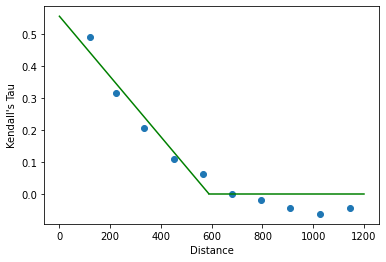

In [10]:
# calculate kendalls tau per bin
spatial_copula.calculate_kendall()

# fit the model for kendall's tau and bins
spatial_copula.fit_model_kendall()

# plot the model
spatial_copula.plot_kendall()



In [11]:
# convert the bins to copulas
spatial_copula.calculate_copulas()

print(spatial_copula.copulas)

[<pyvinecopulib.Bicop>
Gumbel 180°, parameters = 1.79849, <pyvinecopulib.Bicop>
Gumbel 180°, parameters = 1.53474, <pyvinecopulib.Bicop>
Clayton, parameters = 0.633964, <pyvinecopulib.Bicop>
Clayton, parameters = 0.303385, <pyvinecopulib.Bicop>
Independence, <pyvinecopulib.Bicop>
Independence]


In [ ]:
dasdasd

In [16]:
spatial_copula2 = SpatialCopula.next_copula(spatial_copula, num_bins=10, cutoff_value=1200)
spatial_copula2


In [19]:
spatial_copula2.neighbourhoods
spatial3.

[    index1  index2    distance    rank1     rank2
 0        1       2  141.566239  0.82676  0.427993
 1        1       7  195.010256  0.82676  0.354671
 2        1       6  234.401365  0.82676  0.305920
 3        1       3  282.851551  0.82676  0.210108
 4        1      12  266.011278  0.82676  0.885129
 5        1       4  362.640318  0.82676  0.309327
 6        1      13  311.081983  0.82676  0.519492
 7        1       8  328.867755  0.82676  0.406518
 8        1      83  356.349547  0.82676  0.337155
 9        1      15  367.925264  0.82676  0.877896
 10       1      14  397.246775  0.82676  0.421056
 11       1       9  441.530293  0.82676  0.143516
 12       1       5  471.199533  0.82676  0.404921
 13       1      10  473.080331  0.82676  0.194324
 14       1     128  471.097654  0.82676  0.576769
 15       1      11  527.046488  0.82676  0.410256
 16       1      16  524.175543  0.82676  0.711538
 17       1      23  645.811892  0.82676  0.339744
 18       1      29  693.882555

In [13]:
spatial_copula.neighbourhoods
spatial_copula.bin_means_list
spatial_copula.copulas
spatial_copula.predict
spatial_copula.bin_means_cut
spatial_copula.num_bins
spatial_copula.cutoff_value
spatial_copula.degree
spatial_copula.kendall_list

# Build next spatial copula tree


[0.49128290821101833,
 0.31749328681468936,
 0.20587215039753995,
 0.11046832140273445,
 0.06368571777527028,
 -0.00031983531939233683,
 -0.01714694608459044,
 -0.043897105155052164,
 -0.06214141183224382,
 -0.0426825767789177]

In [14]:
super_list_neighbourhood = [list_neighbourhood]
super_bin_means_list = [bin_means_list]
super_cops = [cops]
super_model_list = [model_predict]
super_bin_means_cut = [bin_means_cut]
num_bins_list = [num_bins]
cutoff_list = [cutoff_value]
degree_list = [degree]
super_kendall_list = [kendall_list]
# not parametrized by distance

spatial_copula.neighbourhoods
spatial_copula.bin_means_list
spatial_copula.copulas
spatial_copula.predict
spatial_copula.bin_means_cut
spatial_copula.num_bins
spatial_copula.cutoff_value
spatial_copula.degree
spatial_copula.kendall_list





num_bins_list.extend([10, 12, 12, 12, 12, 12, 8, 8, 6,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

cutoff_list.extend([1000, 1000, 800, 600, 600, 800, 800, 800,
                   800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800])

degree_list.extend([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


NameError: name 'list_neighbourhood' is not defined

In [ ]:
super_list_neighbourhood, super_bin_means_list, super_cops, super_model_list,super_bin_means_cut, super_kendall_list = \
build_vine_copula(super_list_neighbourhood, super_bin_means_list, super_cops, super_model_list, super_bin_means_cut,
                  super_kendall_list, distance_df, cutoff_list, num_bins_list, degree_list, family_set, neigh_size)



In [ ]:
super_list_neighbourhood[0][2][0:4].rename(columns={"index1": "center_id", "index2": "neigh_id", "rank1": "center_rank", "rank2": "neigh_rank"})[
    ["center_id", "neigh_id", "distance", "center_rank", "neigh_rank"]]


,center_id,neigh_id,distance,center_rank,neigh_rank
0,2,0,118.848643,0.724359,0.897436
1,2,1,141.566239,0.724359,0.935897
2,2,3,143.171226,0.724359,0.423077
3,2,6,167.000000,0.724359,0.525641


In [ ]:
df, frozen_lognorm = add_lognormal(df)
df_whole_ln = construct_pairs_lognorm(df)
df_whole_ln

,index1,index2,ln1,ln2,distance
0,0,1,0.926547,0.945601,70.837843
1,0,2,0.926547,0.788166,118.848643
2,0,3,0.926547,0.319917,259.239272
3,0,4,0.926547,0.342919,366.314073
4,0,5,0.926547,0.365477,473.629602
...,...,...,...,...,...
23865,154,149,0.522803,0.235025,1600.647681
23866,154,150,0.522803,0.141102,1443.022176
23867,154,151,0.522803,0.672142,1545.369859
23868,154,152,0.522803,0.471767,1756.173397


In [ ]:
# now we need to predict the mean with the expectation
# with the list_neighbourhood_ln as neighs
# df as our data train
# df as our data test
# super_cops for the copulas


In [ ]:
# here we choose the number of neighbours we want for prediction
neigh_size = 20
list_neighbourhood_ln = build_neighbourhood(df_whole_ln, number_of_stations=NUMBER_OF_STATIONS, neighbourhood_size=neigh_size)
list_neighbourhood_ln[144]


,index1,index2,ln1,ln2,distance
0,144,143,0.645783,0.562482,125.031996
1,144,145,0.645783,0.769713,181.107703
2,144,140,0.645783,0.185381,202.921167
3,144,148,0.645783,0.321849,202.987684
4,144,142,0.645783,0.146747,224.207493
5,144,141,0.645783,0.119068,234.446156
6,144,94,0.645783,0.254971,311.090019
7,144,146,0.645783,0.761983,341.669431
8,144,150,0.645783,0.141102,347.495324
9,144,149,0.645783,0.235025,373.085781


In [ ]:
h_big = distances_per_tree(super_list_neighbourhood, neigh_size, number_of_stations=NUMBER_OF_STATIONS)


In [ ]:
df_result = calculate_predictions(list_neighbourhood_ln, df, super_cops, super_model_list,
                          super_bin_means_cut, neigh_size, frozen_lognorm, h_big,
                          NUMBER_OF_STATIONS)

Data point 0
Data point 1
Data point 2
Data point 3
Data point 4
Data point 5
Data point 6
Data point 7
Data point 8
Data point 9
Data point 10
Data point 11
Data point 12
Data point 13
Data point 14
Data point 15
Data point 16
Data point 17
Data point 18
Data point 19
Data point 20
Data point 21
Data point 22
Data point 23
Data point 24
Data point 25
Data point 26
Data point 27
Data point 28
Data point 29
Data point 30
Data point 31
Data point 32
Data point 33
Data point 34
Data point 35
Data point 36
Data point 37
Data point 38
Data point 39
Data point 40
Data point 41
Data point 42
Data point 43
Data point 44
Data point 45
Data point 46
Data point 47
Data point 48
Data point 49
Data point 50
Data point 51
Data point 52
Data point 53
Data point 54
Data point 55
Data point 56
Data point 57
Data point 58
Data point 59
Data point 60
Data point 61
Data point 62
Data point 63
Data point 64
Data point 65
Data point 66
Data point 67
Data point 68
Data point 69
Data point 70
Data point 71
Da

In [ ]:
mean_absoulte_error = (np.mean(abs(df_result["result"] - df_result["zinc"])))
bias = (np.mean(df_result["result"] - df_result["zinc"]))
root_squared_error = (
    np.sqrt(np.mean((df_result["result"] - df_result["zinc"])**2)))
print(f"MAE: {mean_absoulte_error}")
print(f"Bias: {bias}")
print(f"RMSE: {root_squared_error}")


MAE: 158.69753957762217
Bias: -33.143570330337496
RMSE: 248.2485983257283


In [ ]:
df_result["x"] = df["x"]
df_result["y"] = df["y"]
df_result["result"].describe()

count     155.000000
mean      436.572559
std       252.776733
min       141.722381
25%       235.472144
50%       387.803190
75%       583.309812
max      1348.269201
Name: result, dtype: float64

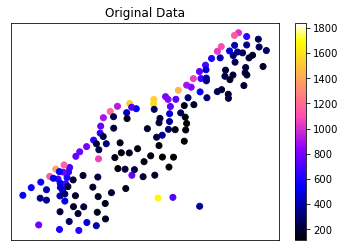

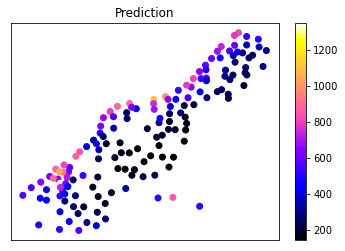

In [ ]:
plot_original_data(df_result)
plot_predicted_data(df_result)


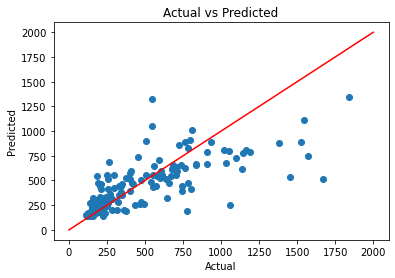

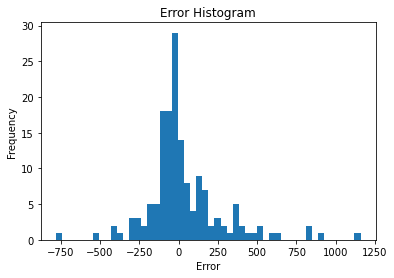

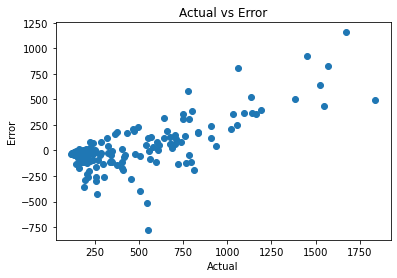

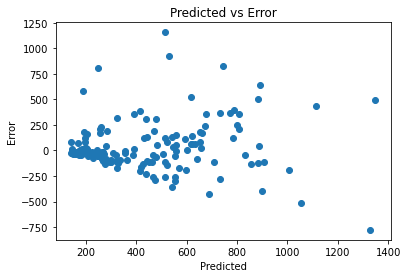

Median Absolute Error: 93.74100006355155
Mean Absolute Error: 158.69753957762217
Mean Squared Error: 61627.366570688784
Root Mean Squared Error: 248.2485983257283


In [ ]:
plot_result_statistics(df_result)
